In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load train and test data

In [2]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import cross_validation
from implementations import ridge_regression
from cost import compute_loss
from plots import plot_cross_validation

### Load train and test data

In [3]:
# Data paths
DATA_TRAIN_PATH = 'data/train.csv'

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [4]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [5]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 1
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 1

In [6]:
# get train and test data
train_index = jet_train_samples[1]
x, y = X[train_index], Y[train_index]

### Best degree

In [7]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

C:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 71.05686234052064 71.03193025894976
2 75.62889026445201 75.54678634065822
3 76.59909212834003 76.51011038894048
4 77.67289108978989 77.60755184153513
5 78.11565046941091 78.00990405447232
6 78.49865882595688 78.37485814505312
7 79.28358953196465 79.15634994325802
8 80.0169366209292 79.859176725472
9 80.2718456618178 80.10677808727948
10 80.34277313525223 80.13514907665326
11 80.47431135871247 80.28474156607862
12 80.66001238006808 80.44851955019085
13 79.05017366484405 78.71917878881666
14 76.61499707692836 76.46626431445372
15 79.06650847690774 78.88811513463324
16 73.05615736442105 72.90054678634067
17 77.63549296743354 77.33802744248428
18 78.82965370198424 78.65985762921696
19 77.30191891055401 77.1690910966677


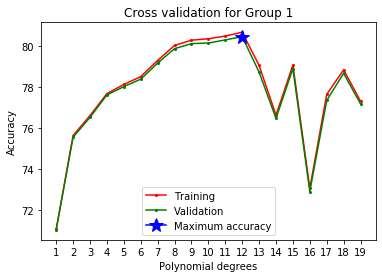

In [8]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.plot(best_degree, max_accuracy, label="Maximum accuracy", marker = '*', markersize=14, color = "blue")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees")
plt.ylabel("Accuracy")
plt.title("Cross validation for Group 1")
plt.legend()
plt.savefig("degree_group1")
plt.show()

### Best lambda

In [9]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

1e-08 80.59467313181334 80.38146084803466
1e-07 80.55555555555554 80.24863303414836
1e-06 80.6037002647959 80.3595378107913
1e-05 80.60670930912342 80.39822552357371
0.0001 80.63851920630007 80.44336118848653
0.001 80.66001238006808 80.44851955019085
0.01 80.26883661749028 80.08356545961003


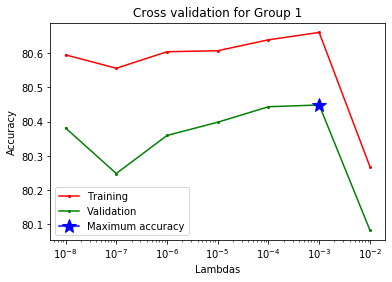

In [10]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, label="Maximum accuracy", marker = '*', markersize=14, color = "blue")
plt.xlabel("Lambdas")
plt.ylabel("Accuracy")
plt.title("Cross validation for Group 1")
plt.legend()
plt.savefig("lambda_group1")
plt.show()